Importing the Dependencies

In [1]:
import numpy as np3
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

Data Collection & Pre-Processing

In [2]:

from google.colab import files
uploaded = files.upload()

import os
print(os.listdir())
file_name = 'mail_data.csv'
if file_name in uploaded:

    import pandas as pd
    raw_mail_data = pd.read_csv(file_name)
    print("CSV file loaded successfully!")


    print(raw_mail_data.head())
else:
    print(f"{file_name} not found. Please upload the file.")



Saving mail_data.csv to mail_data.csv
['.config', 'mail_data.csv', 'sample_data']
CSV file loaded successfully!
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
#print(raw_mail_data)
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [5]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

In [7]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam  -  0

ham  -  1

In [8]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

<ipython-input-9-c4e11fd59ceb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=raw_mail_data, palette={'ham': "blue", 'spam': 'green'})


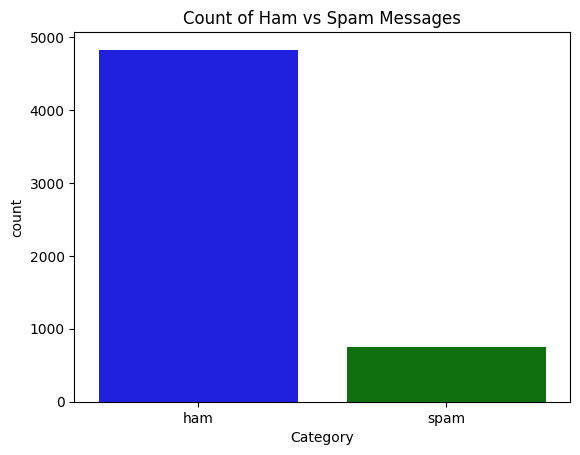

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Category', data=raw_mail_data, palette={'ham': "blue", 'spam': 'green'})
plt.title("Count of Ham vs Spam Messages")
plt.show()

In [10]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [11]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [13]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [14]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

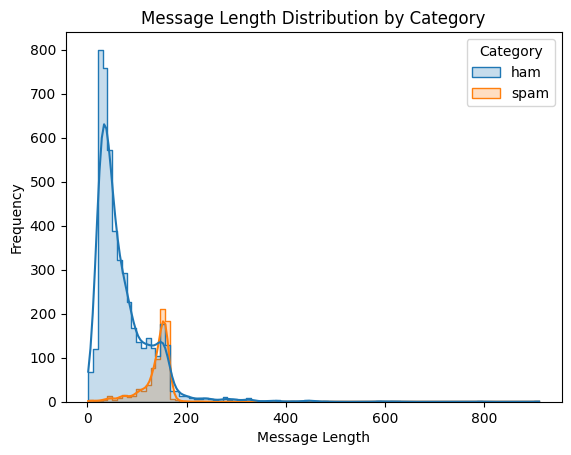

In [15]:
raw_mail_data['Message_Length'] = raw_mail_data['Message'].apply(len)
sns.histplot(data=raw_mail_data, x='Message_Length', hue='Category', kde=True, element="step")
plt.title("Message Length Distribution by Category")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

In [16]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [17]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

<ipython-input-18-845c37516d03>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Word_Count', data=raw_mail_data, palette={'ham': 'purple', 'spam': 'pink'})


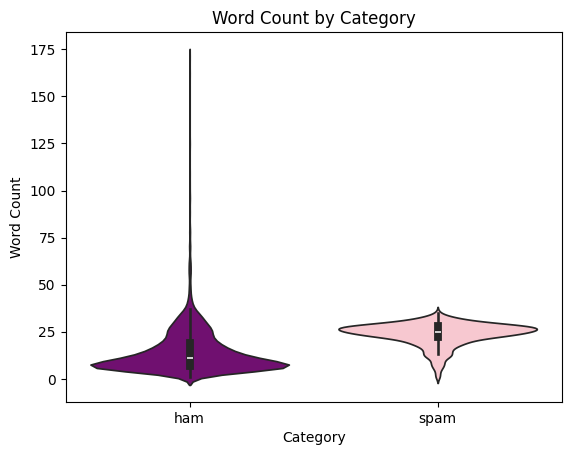

In [18]:
raw_mail_data['Word_Count'] = raw_mail_data['Message'].apply(lambda x: len(x.split()))
sns.violinplot(x='Category', y='Word_Count', data=raw_mail_data, palette={'ham': 'purple', 'spam': 'pink'})
plt.title("Word Count by Category")
plt.ylabel("Word Count")
plt.show()

Training the Model

Logistic Regression

In [19]:
model = LogisticRegression()

In [20]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [21]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [22]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9676912721561588


In [23]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [24]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9668161434977578


Building a Predictive System

In [25]:
input_text = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_text)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham message')

else:
  print('Spam message')

[1]
Ham message


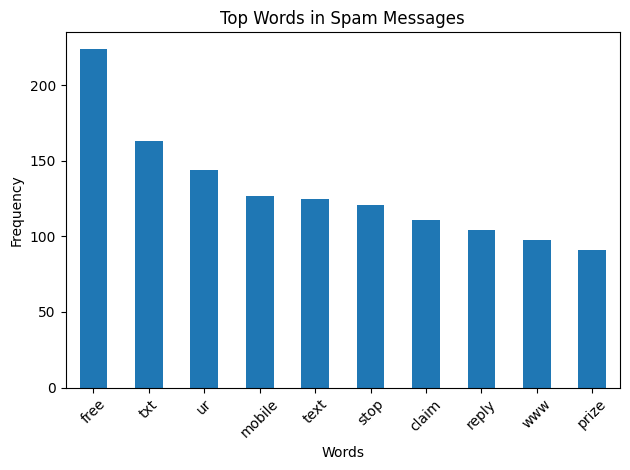

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizing the spam messages
vectorizer = CountVectorizer(stop_words='english')
counts = vectorizer.fit_transform(raw_mail_data[raw_mail_data['Category'] == 'spam']['Message'])

# Creating a DataFrame of word frequencies
word_counts = pd.DataFrame(
    counts.sum(axis=0),
    columns=vectorizer.get_feature_names_out(),
    index=['Frequency']
).T

# Sorting and selecting top 10 words
word_counts = word_counts.sort_values(by='Frequency', ascending=False).head(10)

# Plotting
word_counts.plot(kind='bar', legend=False)
plt.title("Top Words in Spam Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-27-b5a30c6ad44c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=mail_data, palette={"0": "red", "1": "blue"})


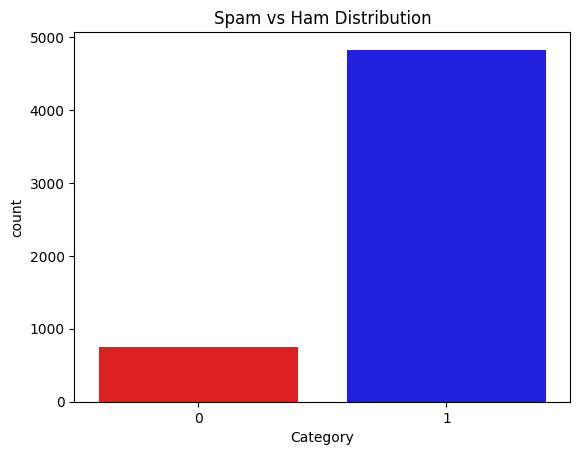

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 122s 744ms/step - accuracy: 0.8869 - loss: 0.3071 - val_accuracy: 0.9713 - val_loss: 0.1135 - learning_rate: 0.0010
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 109s 780ms/step - accuracy: 0.9867 - loss: 0.0612 - val_accuracy: 0.9839 - val_loss: 0.0660 - learning_rate: 0.0010
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 133s 719ms/step - accuracy: 0.9928 - loss: 0.0305 - val_accuracy: 0.9812 - val_loss: 0.0917 - learning_rate: 0.0010
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.9968 - loss: 0.0150
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
140/140 ━━━━━━━━━━━━━━━━━━━━ 148s 761ms/step - accuracy: 0.9968 - loss: 0.0150 - val_accuracy: 0.9785 - val_loss: 0.0982 - learning_rate: 0.0010
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 138s 734ms/step - accuracy: 0.9977 - loss: 0.0106 - val_accuracy: 0.9812 - val_loss: 0.1063 - learning_rate: 5.0000e-04
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accurac

In [ ]:
#Spam Email Classifier using LSTM(Long Short Term Memory
#This project is designed to detect spam emails using Natural Language Processing (NLP) and Deep Learning. It helps filter out spam messages by analyzing the text of emails.
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
file_name = 'mail_data.csv'
raw_mail_data = pd.read_csv(file_name)

# Handle missing values
mail_data = raw_mail_data.where(pd.notnull(raw_mail_data), '')

# Label Encoding: spam = 0, ham = 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

# Convert labels to integers (Fix for ValueError)
mail_data['Category'] = mail_data['Category'].astype(int)

# Plot Spam vs Ham distribution
sns.countplot(x='Category', data=mail_data, palette={"0": "red", "1": "blue"})



plt.title("Spam vs Ham Distribution")
plt.show()

# Prepare data
X = mail_data['Message']
Y = mail_data['Category']

# Train-test split (with stratify to handle imbalance)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Tokenization and Padding
vocab_size = 5000  # Limit vocabulary size
max_length = 100  # Max length of sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length, padding='post')

# Build Improved LSTM Model
model = Sequential([
    Embedding(vocab_size, 128),  # ✅ Removed `input_length` as it's deprecated
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Binary classification (spam or ham)
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reduce Learning Rate if validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, verbose=1)

# Train the model
history = model.fit(X_train_seq, Y_train, epochs=10, batch_size=32, validation_data=(X_test_seq, Y_test), callbacks=[lr_scheduler])

# Evaluate model
loss, accuracy = model.evaluate(X_test_seq, Y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Save the model and tokenizer
model.save('spam_lstm_model.h5')

import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print("✅ Model and tokenizer saved successfully!")

# Plot Training History
plt.figure(figsize=(12, 4))

# Loss Graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Accuracy Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()





In [ ]:
#SPAM EMAIL CLASSIFICATION USING GRU(Gated Recurrent Unit)- A type of RNN(Recurrent Neural Network) to identify whether an email is spam (unwanted) or ham (normal).
# Import Required Libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Sample Dataset (Replace with your actual dataset)
data = {
    'Message': ["Free money now!", "Hello, how are you?", "Congratulations, you won!", "Meeting at 3 PM today"],
    'Category': [0, 1, 0, 1]  # 0 = Spam, 1 = Ham
}
mail_data = pd.DataFrame(data)

# Label Encoding
mail_data['Category'] = mail_data['Category'].astype(int)

# Text Preprocessing
X = mail_data['Message']
Y = mail_data['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Tokenization and Padding
vocab_size = 5000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length, padding='post')

# Build GRU Model
model_gru = Sequential([
    Embedding(vocab_size, 128),
    SpatialDropout1D(0.3),
    GRU(100, dropout=0.3, recurrent_dropout=0.3, return_sequences=True),
    GRU(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile Model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history_gru = model_gru.fit(X_train_seq, Y_train, epochs=10, batch_size=2, validation_data=(X_test_seq, Y_test))

# Evaluate the Model
loss, accuracy = model_gru.evaluate(X_test_seq, Y_test)
print(f'Test Accuracy for GRU: {accuracy:.4f}')

# Plot Training History
plt.figure(figsize=(12, 4))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [ ]:
#for building a Spam Email Classifier using machine learning (Naive Bayes) and text processing techniques (TF-IDF Vectorizer).
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Sample Data (replace this with your actual data)
data = {'Message': ["Free money now!", "Hello, how are you?", "Congratulations, you won!", "Meeting at 3 PM today"],
        'Category': [0, 1, 0, 1]}  # 0 = Spam, 1 = Ham
df = pd.DataFrame(data)

# Check class distribution
print("Class distribution:", df['Category'].value_counts())

# Data Preprocessing
X = df['Message']
Y = df['Category']

# If the dataset is too small, reduce the test size or remove stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)  # or test_size=0.01

# Feature Extraction using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_features, Y_train)

# Make predictions
predictions = nb_model.predict(X_test_features)

# Evaluate the model using classification report
print(classification_report(Y_test, predictions, zero_division=1))

